# Introduction 

This project involves an investigation into a lending dataset to predict good and bad loans in 2015 (https://www.lendingclub.com/info/download-data.action). The objective is to clean, visualize the data and than build a logistic regression predictive model to determine whether loans in the dataset are good or bad. 

# Part I 

# Data Cleaning

Firstly, we import the csv file and check the basic properties of the dataset. We than proceed by removing the few null values (only 2 rows out of over 400,000). We converted categorical features to dummy variables, converted columns imported as strings to integers/floats, took a random sampling of the dataset and set all categories of the loan_status feature to either good or bad. Afterwards, we preprocessed the dataset by normalizing it with the MinMax Scaler.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in the csv file
bb = pd.read_csv('../project-05/LoanStats3d.csv', \
         keep_default_na = False, skiprows=1, usecols=['int_rate', \
        'dti', 'annual_inc', 'home_ownership', 'funded_amnt', 'term', 'loan_status'])

bb.columns

/Users/Misha/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'funded_amnt', u'term', u'int_rate', u'home_ownership', u'annual_inc',
       u'loan_status', u'dti'],
      dtype='object')

In [3]:
bb.head(10)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
0,35000,60 months,14.85%,MORTGAGE,110000,Current,17.06
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37
2,20000,60 months,10.78%,MORTGAGE,63000,Current,10.78
3,25000,36 months,7.49%,MORTGAGE,109000,Fully Paid,26.02
4,28000,36 months,6.49%,MORTGAGE,92000,Current,21.6
5,18000,60 months,11.99%,MORTGAGE,112000,Fully Paid,8.68
6,16000,60 months,14.85%,MORTGAGE,48000,Current,33.18
7,23000,60 months,8.49%,RENT,64000,Current,18.28
8,8650,36 months,19.89%,RENT,55000,Fully Paid,25.49
9,9600,36 months,7.49%,MORTGAGE,60000,Current,22.44


In [4]:
print set(bb.loan_status)
print set(bb.home_ownership)

set(['', 'Late (31-120 days)', 'Default', 'Fully Paid', 'Current', 'Late (16-30 days)', 'Charged Off', 'In Grace Period'])
set(['', 'OWN', 'RENT', 'MORTGAGE', 'ANY'])


In [5]:
# remove blank rows
bb[bb['loan_status'] == '']
bb[bb['funded_amnt'] == '']
bb[bb['int_rate'] == '']
bb[bb['home_ownership'] == '']
bb[bb['annual_inc'] == '']
bb[bb['dti'] == '']

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
421095,,,,,,,
421096,,,,,,,


In [6]:
# Convert blanks to NaN's 

bb['loan_status'].replace('', np.nan, inplace=True)

In [7]:
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       2
dti               0
dtype: int64

In [8]:
# Drop NA's.

bb = bb.dropna()
bb.isnull().sum()

funded_amnt       0
term              0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       0
dti               0
dtype: int64

In [9]:
# Check how many loans classified as current
len(bb[bb['loan_status'] == 'Current'])

303912

In [10]:
# set the non-current loans to equal bb
bb = bb[bb['loan_status'] != 'Current']
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
1,10400,60 months,22.45%,MORTGAGE,104433,Fully Paid,25.37


In [11]:
# Random sampling of 1000 data points

bb = bb.take(np.random.permutation(len(bb))[:1000])

In [12]:
bb.head(10)

,funded_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti
170974,12000,36 months,9.99%,RENT,55000,Fully Paid,31.7
295292,3000,36 months,16.55%,OWN,32275,Charged Off,37.22
351947,18000,60 months,16.55%,OWN,71000,Charged Off,27.53
281121,16000,60 months,21.99%,MORTGAGE,68000,Fully Paid,25.17
406151,15000,36 months,12.99%,RENT,70000,Charged Off,32.45
226427,28000,60 months,22.99%,MORTGAGE,75000,Fully Paid,8.03
22697,9000,36 months,5.32%,MORTGAGE,82000,Fully Paid,11.77
237303,24000,36 months,11.53%,MORTGAGE,190000,Fully Paid,6.44
244990,6500,36 months,13.33%,OWN,30000,Fully Paid,20.76
199702,5000,36 months,9.99%,RENT,24000,Fully Paid,8.85


In [13]:
# create column target by initilizing the column to all 0's, than set the loan
# statuses of the column into two different categories. Than count how many of each.
bb['target'] = [0]*len(bb)
bb['target'][bb['loan_status'] == 'In Grace Period'] = 1
bb['target'][bb['loan_status'] == 'Fully Paid'] = 1

del bb['loan_status']

bb['target'].value_counts()

/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Misha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    688
0    312
Name: target, dtype: int64

In [14]:
bb.head(1)

,funded_amnt,term,int_rate,home_ownership,annual_inc,dti,target
170974,12000,36 months,9.99%,RENT,55000,31.7,1


In [15]:
bb = bb.reset_index(drop = True)
bad = np.where(bb['target'] == 0)[0]
good = np.where(bb['target'] == 1)[0]

In [16]:
# Remove % sign for interest rate
bb.int_rate = [float(x[:-1]) if (type(x) == str) else x for x in bb['int_rate']]

In [17]:
# Remove non-numeric characters from term column
bb.term = [int(x[:-6]) if (type(x) == str) else x for x in bb['term']]

In [18]:
bb.dtypes

funded_amnt        object
term                int64
int_rate          float64
home_ownership     object
annual_inc         object
dti                object
target              int64
dtype: object

In [19]:
# convert column to integers
bb.funded_amnt = [int(x) if (type(x) == str) else x for x in bb['funded_amnt']]

In [20]:
# convert column to floats
bb.annual_inc  = [float(x) if (type(x) == str) else x for x in bb['annual_inc']]

In [21]:
# covert to float
bb.dti = [float(x) if (type(x) == str) else x for x in bb['dti']]

In [22]:
# Get dummies for Term

term = pd.get_dummies(bb.term)

term.columns = ["36 months", "60 months"]

In [23]:
# Add new term columns to table dataset.

bb = pd.concat([bb, term], axis = 1)

del bb["term"]
del bb['36 months']

In [24]:
# Create dummy variable for every category under home ownership

dumb_home = pd.get_dummies(bb.home_ownership)

dumb_home.head(2)

,MORTGAGE,OWN,RENT
0,0,0,1
1,0,1,0


In [25]:
# Add newly created dummy variable columns to dataset.

bb = pd.concat([bb, dumb_home], axis = 1)

del bb['home_ownership']
del bb['MORTGAGE']

In [26]:
bb.head(1)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,12000,9.99,55000.0,31.7,1,0,0,1


In [27]:
bb.dtypes

funded_amnt      int64
int_rate       float64
annual_inc     float64
dti            float64
target           int64
60 months        uint8
OWN              uint8
RENT             uint8
dtype: object

In [28]:
bb.head(10)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT
0,12000,9.99,55000.0,31.70,1,0,0,1
1,3000,16.55,32275.0,37.22,0,0,1,0
2,18000,16.55,71000.0,27.53,0,1,1,0
3,16000,21.99,68000.0,25.17,1,1,0,0
4,15000,12.99,70000.0,32.45,0,0,0,1
5,28000,22.99,75000.0,8.03,1,1,0,0
6,9000,5.32,82000.0,11.77,1,0,0,0
7,24000,11.53,190000.0,6.44,1,0,0,0
8,6500,13.33,30000.0,20.76,1,0,1,0
9,5000,9.99,24000.0,8.85,1,0,0,1


In [29]:
#Normalizing variables

from sklearn.preprocessing import MinMaxScaler
y = pd.DataFrame(bb['target'], columns = ['target'])
X = bb.drop(['target'], axis = 1)
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [30]:
X_scaled.head(10)

,funded_amnt,int_rate,annual_inc,dti,60 months,OWN,RENT
0,0.323529,0.197296,0.084351,0.790792,0.0,0.0,1.0
1,0.058824,0.474440,0.042314,0.930433,0.0,1.0,0.0
2,0.500000,0.474440,0.113947,0.685302,1.0,1.0,0.0
3,0.441176,0.704267,0.108398,0.625601,1.0,0.0,0.0
4,0.411765,0.324039,0.112098,0.809765,0.0,0.0,1.0
5,0.794118,0.746515,0.121347,0.192006,1.0,0.0,0.0
6,0.235294,0.000000,0.134295,0.286618,0.0,0.0,0.0
7,0.676471,0.262357,0.334073,0.151783,0.0,0.0,0.0
8,0.161765,0.338403,0.038106,0.514040,0.0,1.0,0.0
9,0.117647,0.197296,0.027007,0.212750,0.0,0.0,1.0


In [31]:
min_val = float(bb['funded_amnt'].min())
max_val = float(bb['funded_amnt'].max())

def min_max(x):
    return (x-min_val)/(max_val-min_val)
bb['funded_amnt_standardized'] = bb['funded_amnt'].apply(lambda x: min_max(x))
bb

minimum_int_rate = float(bb['int_rate'].min())
maximum_int_rate = float(bb['int_rate'].max())

def min_max(x):
    return (x-minimum_int_rate)/(maximum_int_rate-minimum_int_rate)
bb['intest_rate_standardized'] = bb['int_rate'].apply(lambda x: min_max(x))
bb


minimum_annual_inc = float(bb['annual_inc'].min())
maximum_annual_inc = float(bb['annual_inc'].max())

def min_max(x):
    return (x-minimum_annual_inc)/(maximum_annual_inc-minimum_annual_inc)
bb['annual_inc_standardized'] = bb['annual_inc'].apply(lambda x: min_max(x))
bb

minimum_dti = float(bb['dti'].min())
maximum_dti = float(bb['dti'].max())

def min_max(x):
    return (x-minimum_dti)/(maximum_dti-minimum_dti)
bb['dti_standardized'] = bb['dti'].apply(lambda x: min_max(x))


bb.head(10)

,funded_amnt,int_rate,annual_inc,dti,target,60 months,OWN,RENT,funded_amnt_standardized,intest_rate_standardized,annual_inc_standardized,dti_standardized
0,12000,9.99,55000.0,31.70,1,0,0,1,0.323529,0.197296,0.084351,0.790792
1,3000,16.55,32275.0,37.22,0,0,1,0,0.058824,0.474440,0.042314,0.930433
2,18000,16.55,71000.0,27.53,0,1,1,0,0.500000,0.474440,0.113947,0.685302
3,16000,21.99,68000.0,25.17,1,1,0,0,0.441176,0.704267,0.108398,0.625601
4,15000,12.99,70000.0,32.45,0,0,0,1,0.411765,0.324039,0.112098,0.809765
5,28000,22.99,75000.0,8.03,1,1,0,0,0.794118,0.746515,0.121347,0.192006
6,9000,5.32,82000.0,11.77,1,0,0,0,0.235294,0.000000,0.134295,0.286618
7,24000,11.53,190000.0,6.44,1,0,0,0,0.676471,0.262357,0.334073,0.151783
8,6500,13.33,30000.0,20.76,1,0,1,0,0.161765,0.338403,0.038106,0.514040
9,5000,9.99,24000.0,8.85,1,0,0,1,0.117647,0.197296,0.027007,0.212750


In [32]:
bb['dti_standardized'].head(10)

0    0.790792
1    0.930433
2    0.685302
3    0.625601
4    0.809765
5    0.192006
6    0.286618
7    0.151783
8    0.514040
9    0.212750
Name: dti_standardized, dtype: float64

In [33]:
del bb['funded_amnt']
del bb['int_rate']  
del bb['annual_inc']
del bb['dti']                  
bb.head(10)

,target,60 months,OWN,RENT,funded_amnt_standardized,intest_rate_standardized,annual_inc_standardized,dti_standardized
0,1,0,0,1,0.323529,0.197296,0.084351,0.790792
1,0,0,1,0,0.058824,0.474440,0.042314,0.930433
2,0,1,1,0,0.500000,0.474440,0.113947,0.685302
3,1,1,0,0,0.441176,0.704267,0.108398,0.625601
4,0,0,0,1,0.411765,0.324039,0.112098,0.809765
5,1,1,0,0,0.794118,0.746515,0.121347,0.192006
6,1,0,0,0,0.235294,0.000000,0.134295,0.286618
7,1,0,0,0,0.676471,0.262357,0.334073,0.151783
8,1,0,1,0,0.161765,0.338403,0.038106,0.514040
9,1,0,0,1,0.117647,0.197296,0.027007,0.212750


# Part II 

# Data Visualization

This section attemps to discover relationships in the loans dataset to see if we can 
notice any interesting relationships.

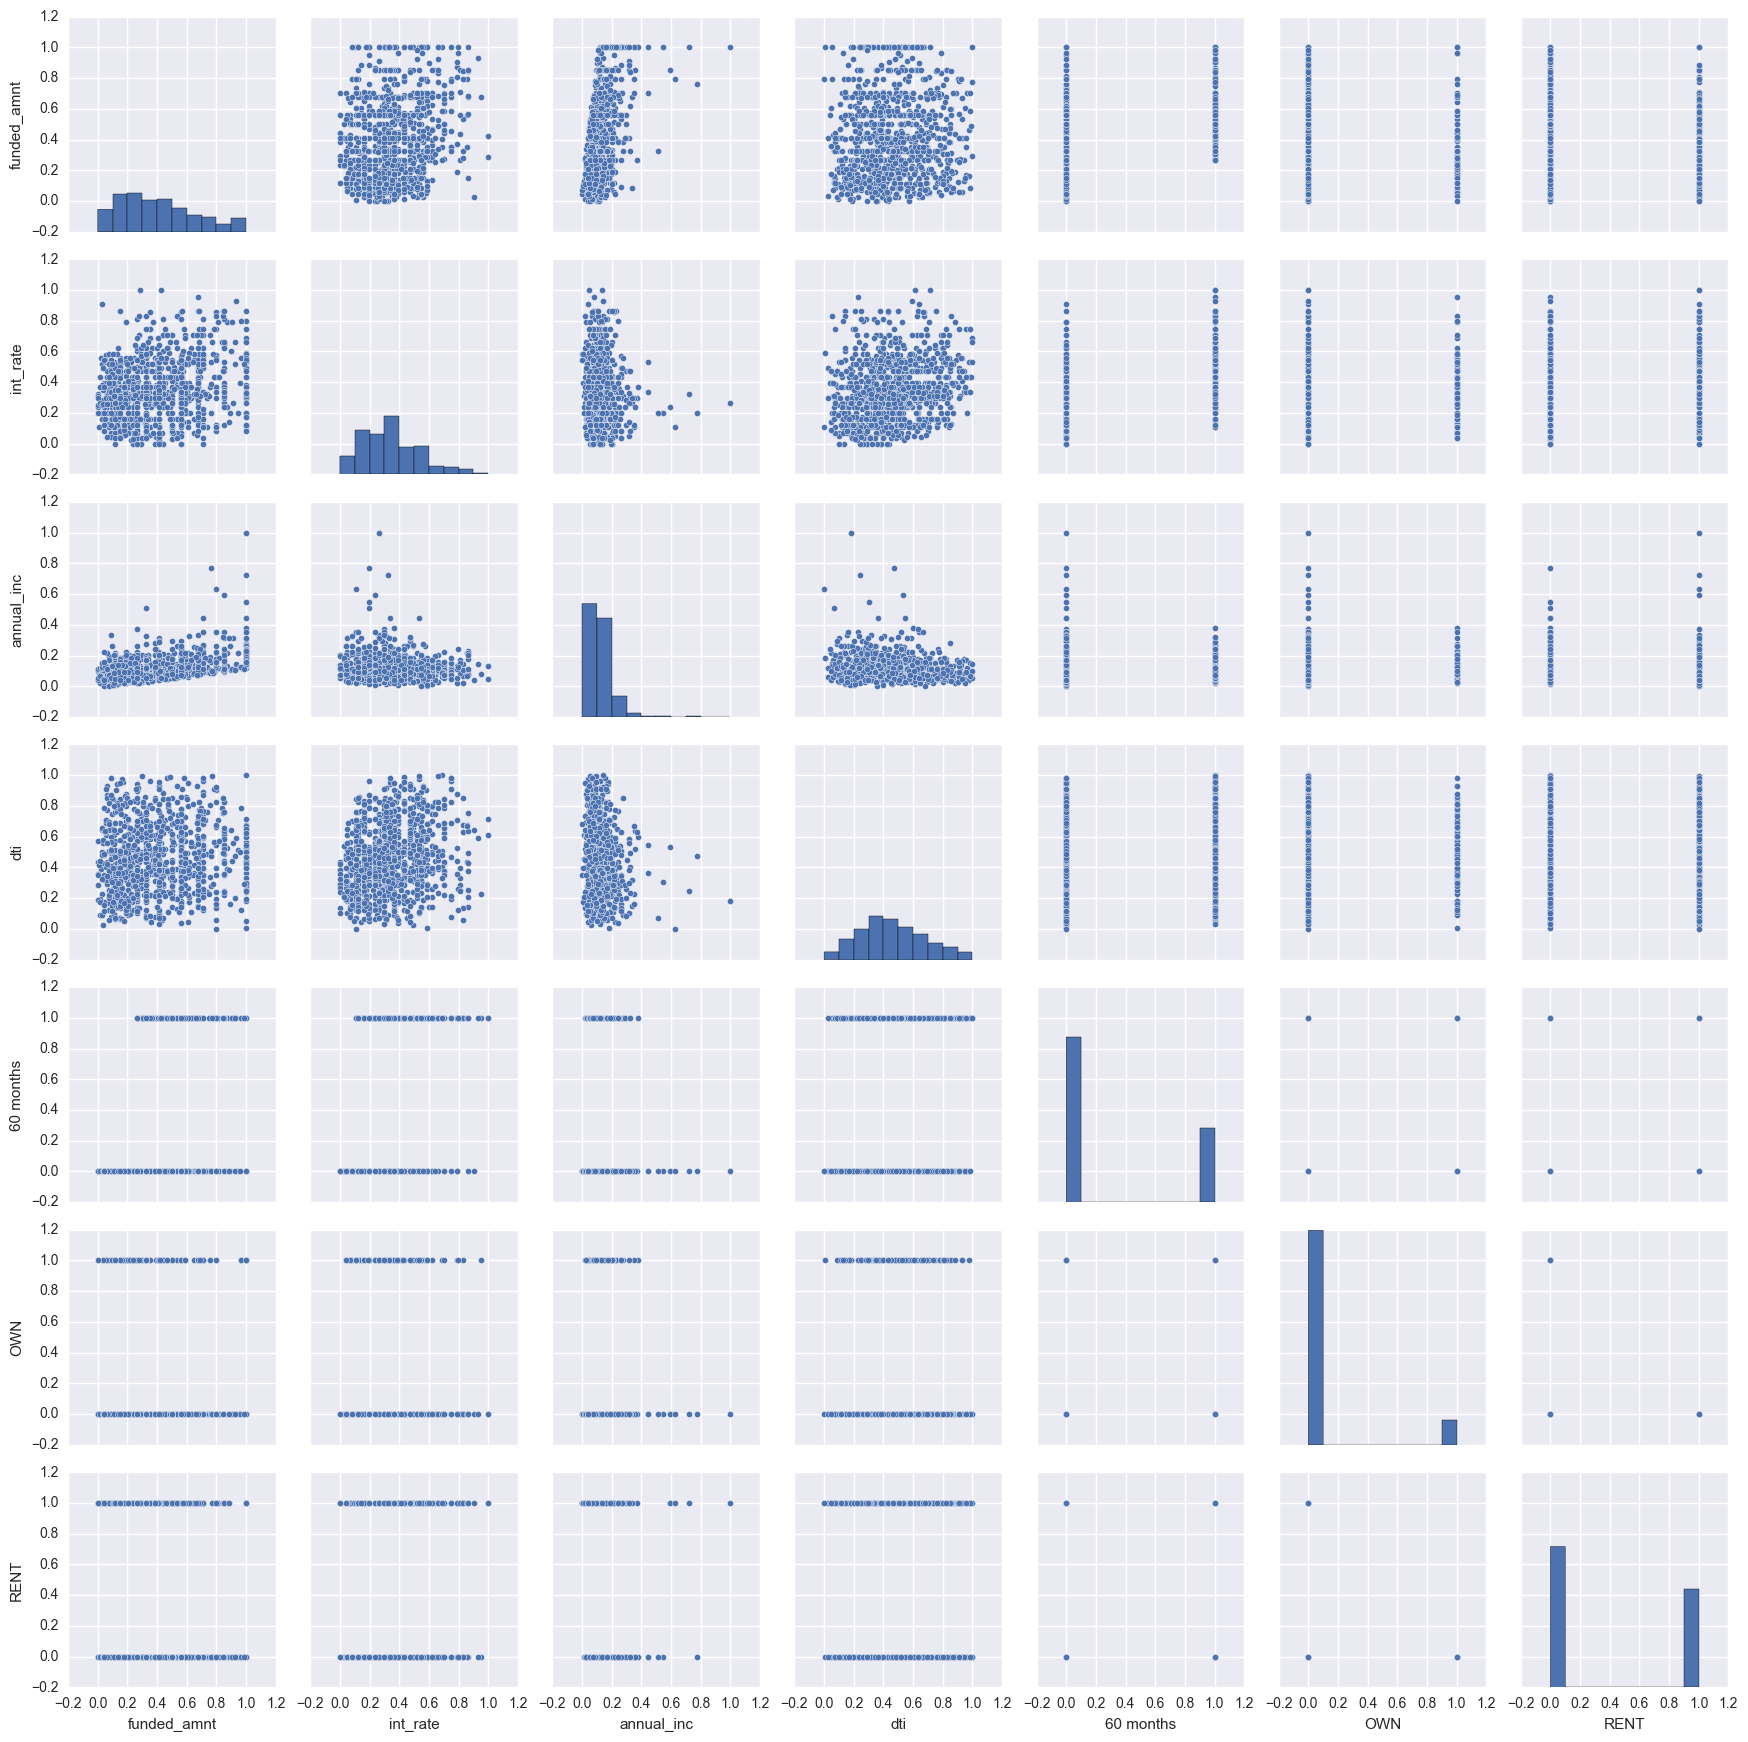

In [34]:
sns.pairplot(X_scaled)

The below plot is a histogram distribution of the loan amounts requested for all individuals.
We can see that the majority of the loans are relatively small.

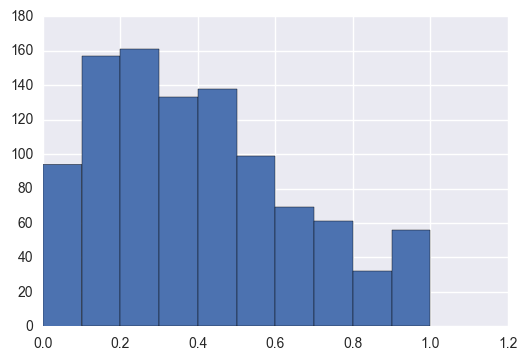

In [35]:
X_scaled.funded_amnt.hist()

In the below histogram distribution, we can see that the the distribution of interest rates
among the people in the dataset is approximately normal but has some skewness in the right tails.

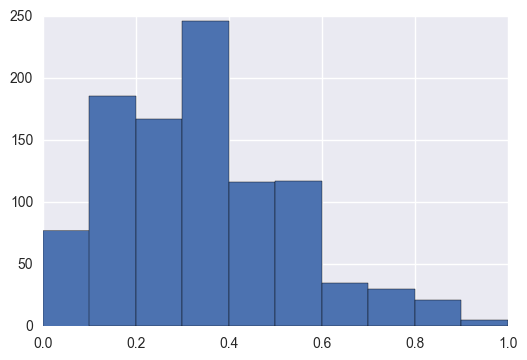

In [36]:
X_scaled.int_rate.hist()

The below scatter plot which compares the DTI ratio vs Interest Rate and whether people 
leave or stay contains some important information. It seems that the concentration of people
that contain good loans is scattered along a relatively low interest rate (those shown in green). When you look at the spread among the people with bad loans, they tend to have a larger concentration among those with high interest rates. However, when comparing the debt to income ratio among the good vs bad loans, it is not immediately clear that one stands out from the other.

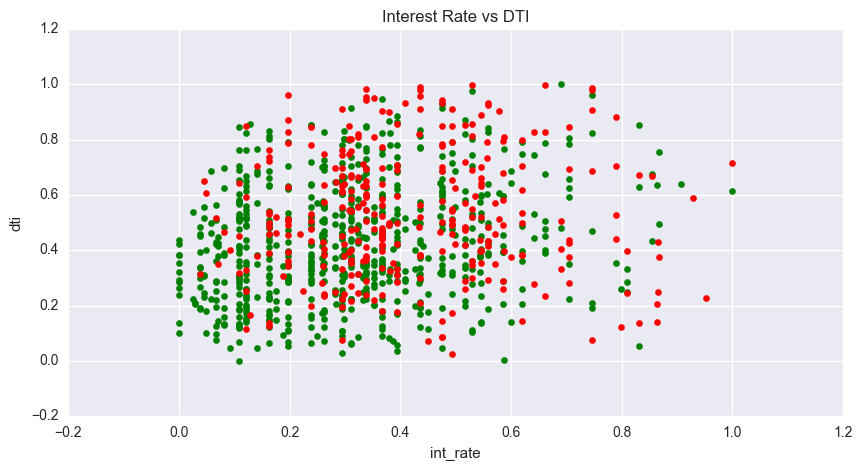

In [37]:
# plot of Interest Rate vs DTI
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.int_rate[good], X_scaled.int_rate[good], alpha=1, color='g')
ax.scatter(X_scaled.int_rate[bad], X_scaled.int_rate[bad], alpha=1, color='r')
ax.set_title("Interest Rate vs ")
ax.set_xlabel("int_rate")
ax.set_ylabel("dti")
plt.show()

From the plot below we can see that the concentrations of relatively large loans is narrow and
the concentration of relatively smaller loans is a lot more dnese and for higher income levels there tends to be more good loans than bad ones.

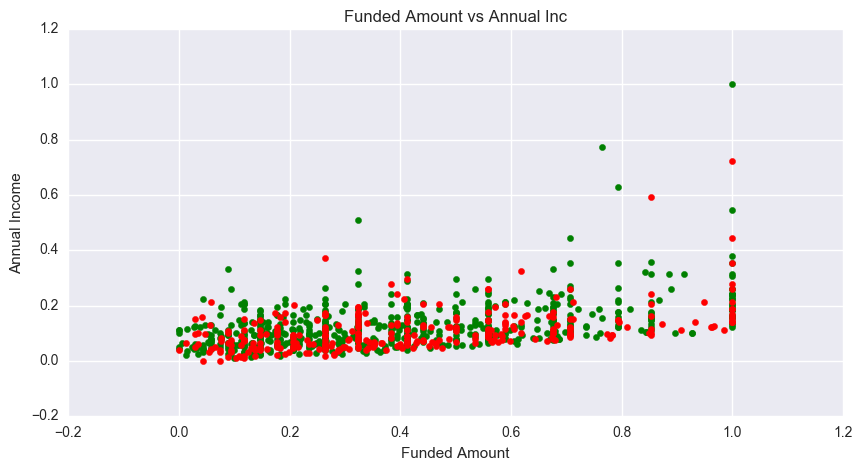

In [38]:
# plot of Funded Amount vs Annual Income
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_scaled.funded_amnt[good], X_scaled.annual_inc[good], alpha=1, color='g')
ax.scatter(X_scaled.funded_amnt[bad], X_scaled.annual_inc[bad], alpha=1, color='r')
ax.set_title("Funded Amount vs Annual Inc")
ax.set_xlabel("Funded Amount")
ax.set_ylabel("Annual Income")
plt.show()

# Part III 

# Predictive Modelling

We first model defaults using the Bayesian approach using a normal prior distribution and 
utilizing the log sigmoid function. Afterwards, we sample from the posterior distribution using Monte Carlo simulation. Afterwards, we predict the probability of the first person in the dataset defaulting. To contrast the Bayesian approach, we than run a logistic regression using Scikit-Learn and compute its various accuracy metrics.


In [39]:
sig = lambda x: 1./(1+np.exp(-x))
def lnpred(data, a):
    pairedsum = a[0] + a[1]*data[1] + a[2]*data[2]+ a[3]*data[3] + a[4]*data[4] + a[5]*data[5] \
    + a[6]*data[6] + a[7]*data[7]
    if data[0] == 1:
        return np.log(sig(pairedsum))
    else:
        return np.log(1-sig(pairedsum))

In [40]:
def lnprob(a,data):
    A2 = np.sum([e**2 for e in a])
    return -0.5*A2 + np.sum([lnpred(e,a) for e in data])



In [41]:
blah = lambda a: lnprob(a, bb.values)

In [42]:
import emcee
nwalkers = 20
ndim = 8
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, blah)
pos, prob, state = sampler.run_mcmc(p0, 1000)
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 10000)
samples = sampler.flatchain

In [43]:
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])






In [44]:
sigmoid = lambda g: 1./(1+np.exp(-g))

def predictive(w):  
    g = w[0] + w[1]*bb.ix[0][0] + w[2]*bb.ix[0][1] + w[3]*bb.ix[0][2] + w[4]*bb.ix[0][3]\
       + w[5]*bb.ix[0][4] + w[6]*bb.ix[0][5] + w[7]*bb.ix[0][6]
    return sigmoid(g)

In [45]:
MonteCarlo(predictive, samples)

0.82691062293435524

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [54]:

X = bb[["60 months", "OWN", "RENT", "funded_amnt_standardized", "intest_rate_standardized", "annual_inc_standardized", "dti_standardized"]]
y = bb["target"]

In [55]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
mdl = model.fit(X_train, y_train)

# predict the response for new observations

logit = model.predict(X_test)

# sklearn output to check that ran on right data split.

len(logit)

250

In [56]:
# These represent the y-intercept and coefficients for all the variables in the logistic regression.

print(model.intercept_)
print(model.coef_)

[ 2.15226051]
[[-0.40301081 -0.63127591 -0.30700953  0.28301205 -1.57851212  0.19766353
  -1.3011543 ]]


In [57]:
# Prediction Accuracy for Logistic Regression

from sklearn import metrics
print(metrics.accuracy_score(y_test, logit))

0.716


In [58]:
from sklearn.cross_validation import cross_val_score

In [59]:
# 10-fold cross-validation for Logistic Regression to find the CV score
mdl = model.fit(X_train, y_train)
scores = cross_val_score(mdl, X_train, y_train, cv=10, scoring= 'accuracy')
print(scores.mean())

0.691867709815


In [60]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, logit)
print ((confusion))

[[ 12  64]
 [  7 167]]


In [61]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

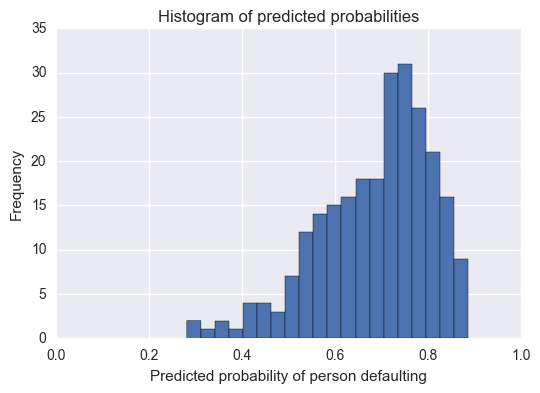

In [62]:
# histogram of predicted probabilities of person defaulting
plt.hist(y_pred_prob, bins=20)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of person defaulting')
plt.ylabel('Frequency')

In [63]:
# Prediction Accuracy.

from sklearn import metrics
print(metrics.accuracy_score(y_test, logit))

0.716


In [64]:
# Classification Accuracy confirmation between manual calculation and formula for Logistic Regression

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, logit))

0.716
0.716


In [65]:
# Misclassification Accuracy confirmation between manual calculation and formula for logistic regression
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, logit))

0.284
0.284


In [66]:
# This Represents the Sensitivity, the % out of True positives that were correctly evaluated as such.
# This is calculated for logistic regression

print(TP / float(TP + FN))
print(metrics.recall_score(y_test, logit))

0.959770114943
0.959770114943


In [67]:
# This represents the Specificity, the % of total True negatives that were correctly identified as negatives.
# This is calculated for logistic regression


print(TN / float(TN + FP))

0.157894736842


In [68]:
# This represents the precision, what % of the values that were predicted to be positive actually are positive.
# This is calculated for logistic regression

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, logit))

0.722943722944
0.722943722944


In [69]:
# Misclassification Accuracy confirmation between manual calculation and formula for logistic regression
# This is also simply equal to 1-(Classification Accuracy calculated above).

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, logit))

0.284
0.284


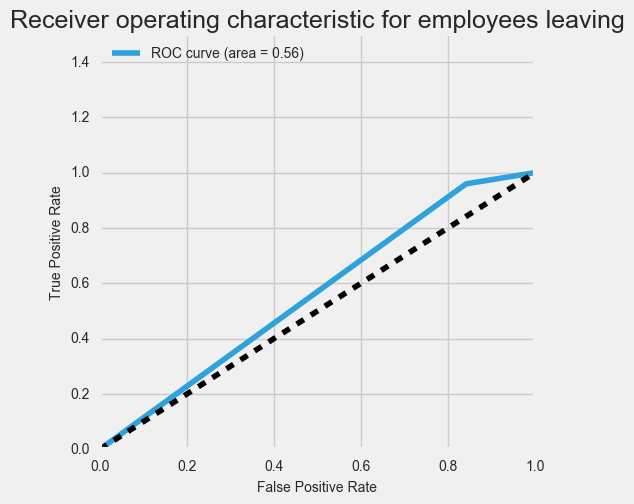

In [70]:
from sklearn.metrics import roc_curve, auc
plt.style.use('fivethirtyeight')

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, logit)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (employee left)
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver operating characteristic for employees leaving', fontsize=18)
plt.legend(loc="upper left")
plt.show()

# Part IV
# Conclusion

The logistic regression predictive model has an accuracy of just over 71% slightly on top of
68% baseline prediction. As can be seen from the ROC curve above (.56), the logistic regression does a fairly poor job modelling this dataset. This can be for a combination of multiple reasons. The relationship in the dataset is possibly of a more complex nature and more advanced models should be tested on it (such as Random Forests, Boosting, etc).

Additionally, it seems likely that we have very few features necessary to build a predictive model for loan defaults. To build a better model, we need additional features that can be of 
critical importance such as individual credit score, the other types of loans they have and have had in the past as well as the amounts of those loans and their repayment status. Incorporating these features as well as some others into a dataset can help create a model
with better predictive power.